In [32]:
!pip install face_recognition -q

In [ ]:
!git clone https://github.com/opencv/opencv 

In [8]:
!pip install realeyes_nel_sdk/dist/native_emotions_library*.tar.gz

Processing ./realeyes_nel_sdk/dist/native_emotions_library*.tar.gz
ERROR: Could not install packages due to an EnvironmentError: [Errno 2] No such file or directory: '/Users/hiratatoumu/Desktop/Laughness/realeyes_nel_sdk/dist/native_emotions_library*.tar.gz'



In [5]:
!pip install fer

     |████████████████████████████████| 810 kB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 2.3 MB 4.5 MB/s eta 0:00:01     |███████████████████████████▉    | 2.0 MB 4.5 MB/s eta 0:00:01
     |████████████████████████████████| 150.2 MB 285 kB/s eta 0:00:01B/s eta 0:00:27     |███████████▊                    | 54.9 MB 1.0 MB/s eta 0:01:33     |███████████████▊                | 73.6 MB 1.0 MB/s eta 0:01:14
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 195.6 MB 942 kB/s eta 0:00:01   |█▏                              | 7.0 MB 9.2 MB/s eta 0:00:21     |██████▉                         | 41.4 MB 983 kB/s eta 0:02:37     |███████████                     | 66.6 MB 878 kB/s eta 0:02:27     |███████████████▍                | 94.2 MB 858 kB/s eta 0:01:59     |███████████████▋                | 95.4 MB 858 kB/s eta 0:01:57     |██████████████████▏             | 111.

  Created wheel for opencv-contrib-python: filename=opencv_contrib_python-4.5.3.56-cp37-cp37m-macosx_10_14_x86_64.whl size=32088383 sha256=0f502d098c84b26c9e48b4fd053613e7b22a4152afda173c210e7934191049b6
  Stored in directory: /Users/hiratatoumu/Library/Caches/pip/wheels/53/7c/b7/4598511aae2db95664ad6a737aebd911b32375998ad5b46b78
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4830 sha256=14228465e531f292dc5696422d5cda774d4a3a9fe1e1f9c204791efbf37ee071
  Stored in directory: /Users/hiratatoumu/Library/Caches/pip/wheels/3f/e3/ec/8a8336ff196023622fbcb36de0c5a5c218cbb24111d1d4c7f2
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-macosx_10_9_x86_64.whl size=32444 sha256=64e26fbb85664994d840f947178cb1ec677e3667217e25ec8fcf29c573a76432
  Stored in directory: /Users/hiratatoumu/Library/Caches/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built opencv-contrib-python termcolor wrapt
ERROR: pytest-astropy 0.8.0 requir

In [32]:
%matplotlib inline
import face_recognition
from fer import FER, Video
import matplotlib
import matplotlib.pyplot as plt
from PIL import ImageDraw, Image, ImageFont
from IPython.display import display
import cv2
import numpy as np
font = {"family": "TakaoGothic"}
matplotlib.rc('font', **font)

# 画像を読み込む。
img = face_recognition.load_image_file("face.jpeg")

### fer library

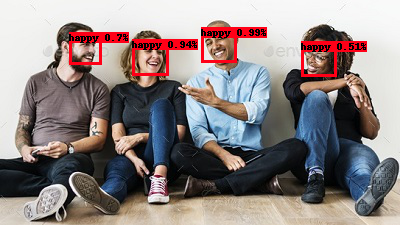

In [28]:
def draw_boxes(img):
    detector = FER(mtcnn=True)
    detection = detector.detect_emotions(img)
    img = Image.fromarray(img)
    draw = ImageDraw.Draw(img, mode="RGBA")

    # 色の一覧を作成する。
    cmap = plt.cm.get_cmap("hsv",  1)

    # フォントを作成する。
    fontsize = max(15, int(0.03 * min(img.size)))
    font = ImageFont.load_default()

    for bbox in detection:
        # 色を取得する。
        color = cmap(0, bytes=True)

        # ラベル
        caption = f"happy {bbox['emotions']['happy']}%"
        top, left, bottom, right = bbox['box']

        # 矩形を描画する。
        draw.rectangle(
            (top, left, top+bottom, right+left), outline=color, width=3
        )

        # ラベルを描画する。
        text_h, text_w = draw.textsize(caption, font=font)
        text_x2 = left + text_w - 1
        text_y2 = top + text_h - 1

        draw.rectangle((top, left, text_y2, text_x2), fill=color)
        draw.text((top, left), caption, fill="black", font=font)
    
    return img
img = plt.imread("face.jpeg")
draw_boxes(img)

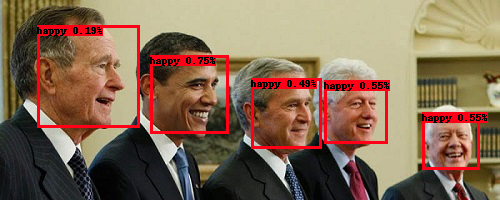

In [29]:
img = plt.imread("face2.jpeg")
draw_boxes(img)

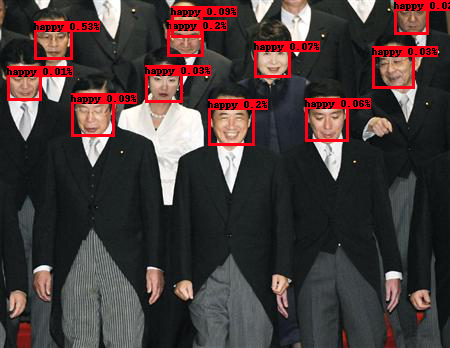

In [30]:
img = plt.imread("face3.jpeg")
draw_boxes(img)

### ビデオ分析

In [35]:
video_filename = "./東海オンエア.mov"
video = Video(video_filename)
# Analyze video, displaying the output
detector = FER(mtcnn=True)
video.analyze(detector, display=True)

![video_analysis](./video_analysis.png)

### 顔検出してみる

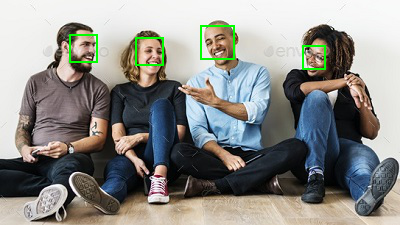

In [2]:
# 画像から顔の領域を検出する。
face_locs = face_recognition.face_locations(img, model="cnn", number_of_times_to_upsample=2)

def draw_faces(img, locs):
    img = Image.fromarray(img)
    draw = ImageDraw.Draw(img, mode="RGBA")

    for top, right, bottom, left in locs:
        draw.rectangle((left, top, right, bottom), outline="lime", width=2)

    display(img)


draw_faces(img, face_locs)

### 画像から顔を切り抜いて笑顔を検出し、定量化してみる

In [3]:
# capture = cv2.VideoCapture(0)
# capture.set(3,640)# 320 320 640 720
# capture.set(4,480)#180 240  360 405

face_cascade = cv2.CascadeClassifier('opencv/data/haarcascades/haarcascade_frontalface_default.xml')
smile_cascade = cv2.CascadeClassifier('opencv/data/haarcascades/haarcascade_smile.xml')
img = face_recognition.load_image_file("face.jpeg")

# 動画用
# while True:
# img = cv2.imread('face.jpeg')
# ret, img = capture.read()
# img = cv2.flip(img,1)#鏡表示にするため．

def show_laghness_score(img):
    face_locs = face_recognition.face_locations(img, model="cnn", number_of_times_to_upsample=2)
    draw_faces(img, face_locs)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#     faces = face_cascade.detectMultiScale(gray, 1.1, 5, minSize=(10,10))
    score = 0
    for ( top, right, bottom, left) in face_locs:
    # for x,y,w,h in faces:
        x,y,w,h=left,top, (right-left), (bottom-top)
    #     cv2.rectangle(img,(x,y),(x+w,y+h),(255, 0, 0),2) # blue
        #Gray画像から，顔領域を切り出す．
    #     roi_gray = gray[y:y+h, x:x+w] 
        roi_gray = gray[top:bottom, left:right] 

        #サイズを縮小
        roi_gray = cv2.resize(roi_gray,(100,100))

         # 輝度で規格化
        lmin = roi_gray.min() #輝度の最小値
        lmax = roi_gray.max() #輝度の最大値
        for index1, item1 in enumerate(roi_gray):
            for index2, item2 in enumerate(item1) :
                roi_gray[index1][index2] = int((item2 - lmin) / (lmax-lmin) * item2)
        #cv2.imshow("roi_gray2",roi_gray)  #輝度を正規化した画像を表示

        smiles= smile_cascade.detectMultiScale(roi_gray, scaleFactor= 1.1, minNeighbors=1, minSize=(20, 20))#笑顔識別
        if len(smiles) >0 : # 笑顔領域がなければ以下の処理を飛ばす．#if len(smiles) <=0 : continue でもよい．その場合以下はインデント不要
            # サイズを考慮した笑顔認識
            smile_neighbors = len(smiles)
            #print("smile_neighbors=",smile_neighbors) #確認のため認識した近傍矩形数を出力
            LV = 1/30
            intensityZeroOne = smile_neighbors  * LV 
            if intensityZeroOne > 1.0: intensityZeroOne = 1.0
            score += intensityZeroOne/len(face_locs)
            #print(intensityZeroOne) #確認のため強度を出力
            for(sx,sy,sw,sh) in smiles:
                cv2.circle(img,(int(x+(sx+sw/2)*w/100),int(y+(sy+sh/2)*h/100)),int(sw/2*w/100), (255*(1.0-intensityZeroOne), 0, 255*intensityZeroOne),2)#red
    plt.imshow(img)
    plt.show()
    return round(score,2)

# plt.imshow(img)
# cv2.imshow('img.png',img)
# plt.imshow(img)
# key Operation
# key=cv2.waitKey(5) 
# if key ==27 or key ==ord('q'): #escまたはeキーで終了
#     break
# capture.release()
# cv2.destroyAllWindows()
# print("Exit") 

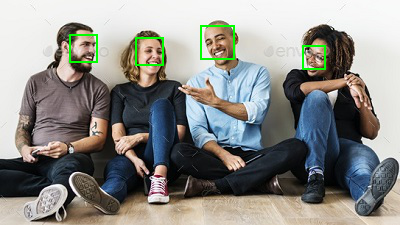

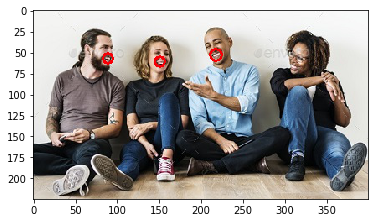

In [4]:
img = face_recognition.load_image_file("face.jpeg")
score = show_laghness_score(img)
# print(f"score: {score}")

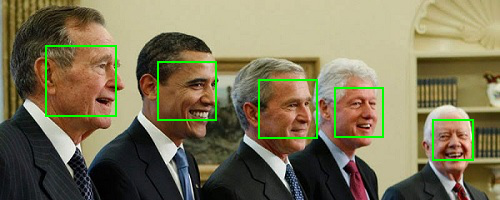

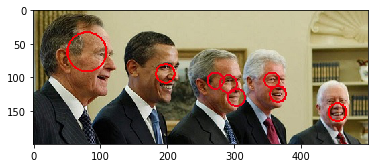

In [5]:
img = face_recognition.load_image_file("face2.jpeg")
score = show_laghness_score(img)
# print(f"score: {score}")

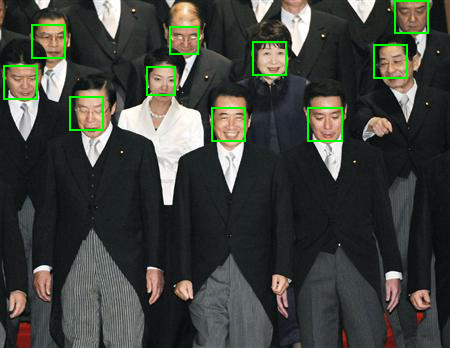

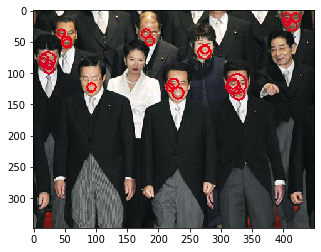

In [6]:
img = face_recognition.load_image_file("face3.jpeg")
score = show_laghness_score(img)
# print(f"score: {score}")

メモ：横顔とか下を向いていたりするとdetectうまくいっていなさそう

顔の各部位の検出

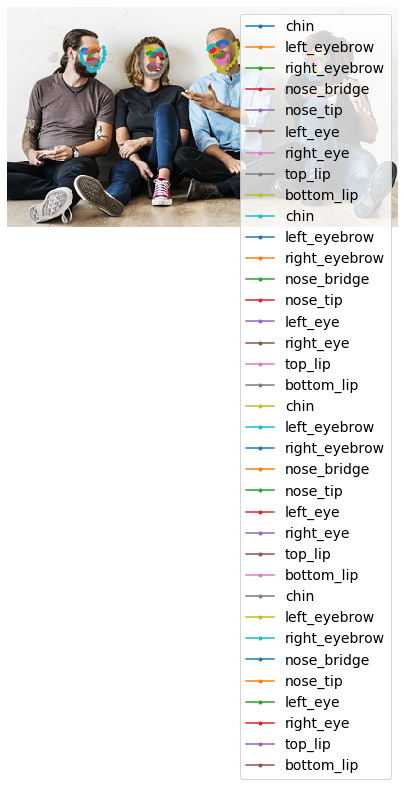

In [4]:
# 画像から顔の領域を検出する。
face_locs = face_recognition.face_locations(img, model="cnn", number_of_times_to_upsample=2)

# 顔の各部位を検出する。
facial_landmarks = face_recognition.face_landmarks(img, face_locs)
#pprint(facial_landmarks)

# 日本語訳
jp_names = {'nose_bridge': '鼻筋',
            'nose_tip': '鼻先',
            'top_lip': '上唇',
            'bottom_lip': '下唇',
            'left_eye': '左目',
            'right_eye': '左目',
            'left_eyebrow': '左眉毛',
            'right_eyebrow': '右眉毛',
            'chin': '下顎'}

# 可視化する。
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img)
ax.set_axis_off()
for face in facial_landmarks:
    for name, points in face.items():
        points = np.array(points)
        ax.plot(points[:, 0], points[:, 1], 'o-', ms=3, label=name)
ax.legend(fontsize=14)

plt.show()